In [3]:
import numpy as np
import pygrib

grbs = pygrib.open('/home/tsuribeh/Forcing_data/ERA5/Monthly avarage U&V/e5bb0e479c242ff6f4bb4e0a17d0728.grib')

# 時間（12ヶ月）、レベル（6）、lat、lonを決める
n_months = 12
levels = [1, 150, 350, 650, 900, 1000]
n_levels = len(levels)

# subsample factor（たとえば、5つに1つを使う）
subsample = 10

# 元の緯度・経度サイズを取得
sample_u = grbs.select(parameterName='U component of wind')[0]
lat2d, lon2d = sample_u.latlons()
lat2d = lat2d[::subsample, ::subsample]
lon2d = lon2d[::subsample, ::subsample]
nlat, nlon = lat2d.shape

# 間引き後の配列を用意
U = np.zeros((n_months, n_levels, nlat, nlon))
V = np.zeros((n_months, n_levels, nlat, nlon))

# データを格納（間引きして）
for month in range(n_months):
    for i, lev in enumerate(levels):
        u_msg = grbs.select(parameterName='U component of wind', level=lev)[month]
        v_msg = grbs.select(parameterName='V component of wind', level=lev)[month]
        U[month, i, :, :] = u_msg.values[::subsample, ::subsample]
        V[month, i, :, :] = v_msg.values[::subsample, ::subsample]


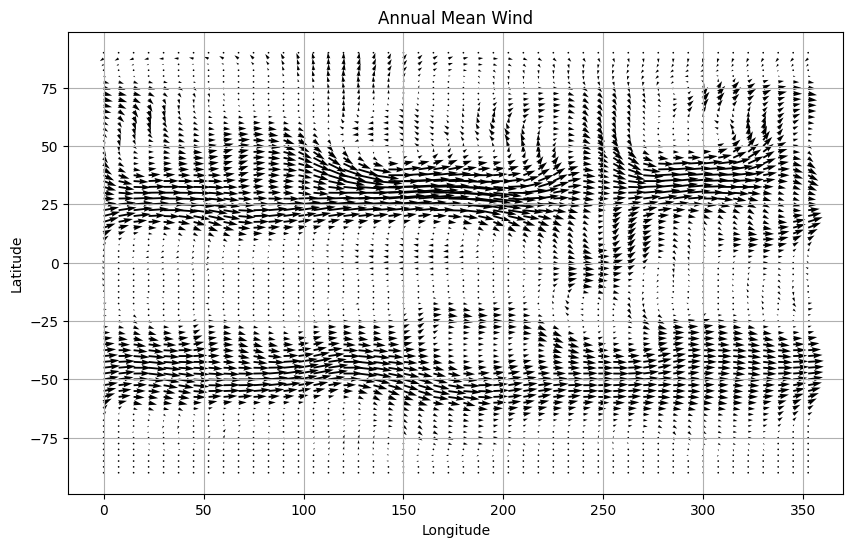

In [4]:
# 年平均：月方向（axis=0）で平均を取る
U_mean = np.mean(U, axis=0)  # shape: (6, nlat, nlon)
V_mean = np.mean(V, axis=0)  # shape: (6, nlat, nlon)

import matplotlib.pyplot as plt

month = 0   # 1月 (0始まり)
level = 2 

skip = (slice(None, None, 1), slice(None, None, 3))

plt.figure(figsize=(10, 6))
# plt.quiver(lon2d[skip], lat2d[skip], U_mean[level][skip], V_mean[level][skip])
plt.quiver(lon2d[skip], lat2d[skip], U[0][level][skip], V[0][level][skip])

plt.title('Annual Mean Wind')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)


